# Neoclassical transport calculations for axisymmetric plasmas

## `SymbolicEquilibrium`

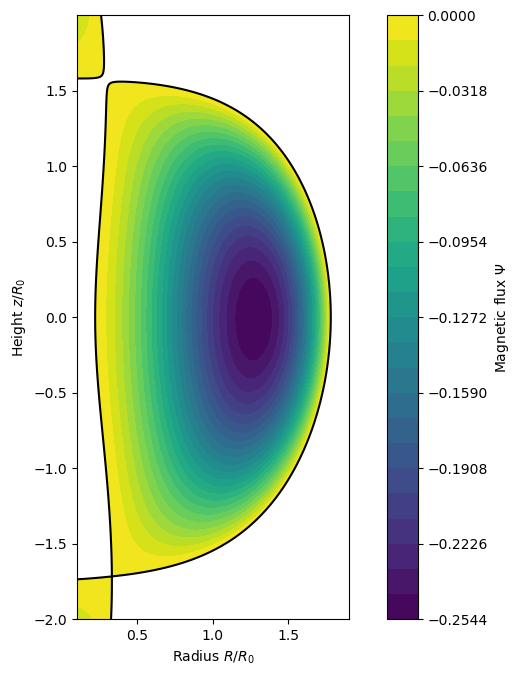

In [1]:
from plasmaboundaries import NSTX_single_null

NSTX_single_null

NSTX_Bt0 = 0.3 * u.T
NSTX_R0 = 0.8 * u.m
NSTX_a0 = 0.64 * u.m
NSTX_I = 1 * u.MA
from plasmapy.plasma.symbolicequilibrium import SymbolicEquilibrium

params = {"aspect_ratio": 0.32, "A": -0.155, "elongation": 1.7, "triangularity": 0.33}
eq = SymbolicEquilibrium(**NSTX_single_null,
                         B0=NSTX_Bt0.si.value, # TODO handle quantity input
                         config="single-null")
rminmaxstep=(0.1, 1.9, 0.001) # these definitely, unfortunately, need to be moved into SymbolicEquilibrium
zminmaxstep=(-2, 2, 0.001)
eq.plot(
    rminmaxstep=rminmaxstep,
    zminmaxstep=zminmaxstep
);

## `FluxSurface`

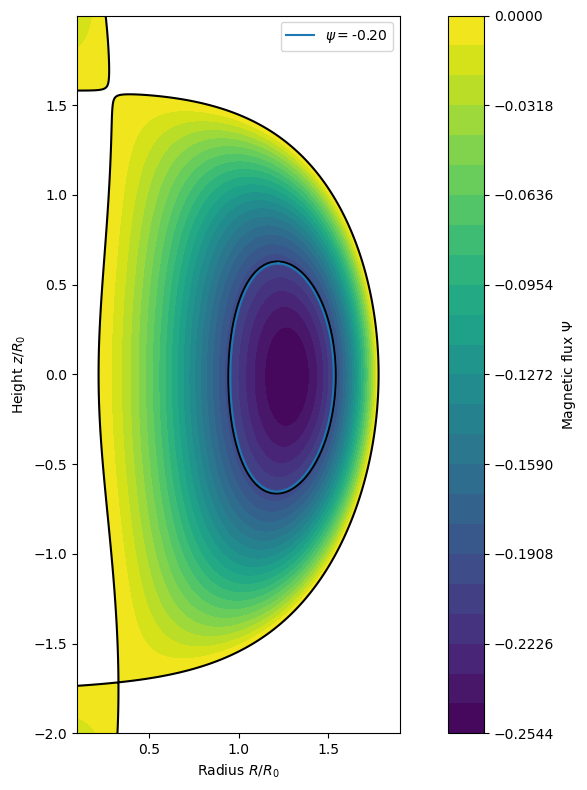

In [2]:
ax = eq.plot(
    rminmaxstep=rminmaxstep,
    zminmaxstep=zminmaxstep
)
flux_surface = eq.get_flux_surface(
    psi_value=-0.2,
    # TODO allow either psi_value or rho_value
    rminmaxstep=rminmaxstep,
    zminmaxstep=zminmaxstep
                                  ) #TODO call this by effective_radius
flux_surface.plot(ax, n=True)
plt.tight_layout()
# plt.savefig("/home/dominik/Writing/blog/images/fluxsurface.png")

## Define particles in our simulation

In [3]:
import astropy.units as u
import numpy as np

from plasmapy.particles import IonizationStateCollection

all_species = IonizationStateCollection(
    {
        "H": [0, 1],
        #      "D": [0, 1],   raises ParticleError, why?
        "C": [0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
    },
    n0=1e20 * u.m ** -3,
    abundances={"H": 1, "C": 0.08},
    T_e=10 * u.eV,
)

<IonizationStateCollection for: H, C>

In [4]:
from plasmapy.transport.flows import FlowCalculator

density_gradient = {
    "H 1+": 1e18 * u.m ** -3 / u.m,
    "C 1+": 1e18 * u.m ** -3 / u.m,
    "C 2+": 1e18 * u.m ** -3 / u.m,
    "C 3+": 1e18 * u.m ** -3 / u.m,
    "C 4+": 1e18 * u.m ** -3 / u.m,
    "C 5+": 1e18 * u.m ** -3 / u.m,
    "C 6+": 1e18 * u.m ** -3 / u.m,
}
temperature_gradient = {
    "H 1+": (-1 * u.eV).to(u.K, equivalencies=u.temperature_energy()) / u.m,
    "C 1+": (-1 * u.eV).to(u.K, equivalencies=u.temperature_energy()) / u.m,
    "C 2+": (-1 * u.eV).to(u.K, equivalencies=u.temperature_energy()) / u.m,
    "C 3+": (-1 * u.eV).to(u.K, equivalencies=u.temperature_energy()) / u.m,
    "C 4+": (-1 * u.eV).to(u.K, equivalencies=u.temperature_energy()) / u.m,
    "C 5+": (-1 * u.eV).to(u.K, equivalencies=u.temperature_energy()) / u.m,
    "C 6+": (-1 * u.eV).to(u.K, equivalencies=u.temperature_energy()) / u.m,
}

fc = FlowCalculator(all_species, flux_surface, density_gradient, temperature_gradient)

/usr/lib/python3.9/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


> /mnt/hdd/Code/github/PlasmaPy/PlasmaPy/plasmapy/transport/neoclassical.py(76)effective_momentum_relaxation_rate()
     74 ):
     75     breakpoint()
---> 76     def contributions():
     77         CL = lambda ai, bj: Coulomb_logarithm(
     78             charge_states_b.T_e,



ipdb>  exit


BdbQuit: 

### Units

In [5]:
a = all_species["C"]

<IonizationState instance for C>

In [7]:
from scipy.special import laguerre?

Signature: laguerre(n, monic=False)
Docstring:
Laguerre polynomial.

Defined to be the solution of

.. math::
    x\frac{d^2}{dx^2}L_n + (1 - x)\frac{d}{dx}L_n + nL_n = 0;

:math:`L_n` is a polynomial of degree :math:`n`.

Parameters
----------
n : int
    Degree of the polynomial.
monic : bool, optional
    If `True`, scale the leading coefficient to be 1. Default is
    `False`.

Returns
-------
L : orthopoly1d
    Laguerre Polynomial.

Notes
-----
The polynomials :math:`L_n` are orthogonal over :math:`[0,
\infty)` with weight function :math:`e^{-x}`.
File:      /usr/lib/python3.9/site-packages/scipy/special/orthogonal.py
Type:      function


In [16]:
from plasmapy.transport.neoclassical import LaguerrePolynomials
from scipy.special import laguerre, genlaguerre

In [17]:
laguerre?

Signature: laguerre(n, monic=False)
Docstring:
Laguerre polynomial.

Defined to be the solution of

.. math::
    x\frac{d^2}{dx^2}L_n + (1 - x)\frac{d}{dx}L_n + nL_n = 0;

:math:`L_n` is a polynomial of degree :math:`n`.

Parameters
----------
n : int
    Degree of the polynomial.
monic : bool, optional
    If `True`, scale the leading coefficient to be 1. Default is
    `False`.

Returns
-------
L : orthopoly1d
    Laguerre Polynomial.

Notes
-----
The polynomials :math:`L_n` are orthogonal over :math:`[0,
\infty)` with weight function :math:`e^{-x}`.
File:      /usr/lib/python3.9/site-packages/scipy/special/orthogonal.py
Type:      function


In [22]:
polys = genlaguerre

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

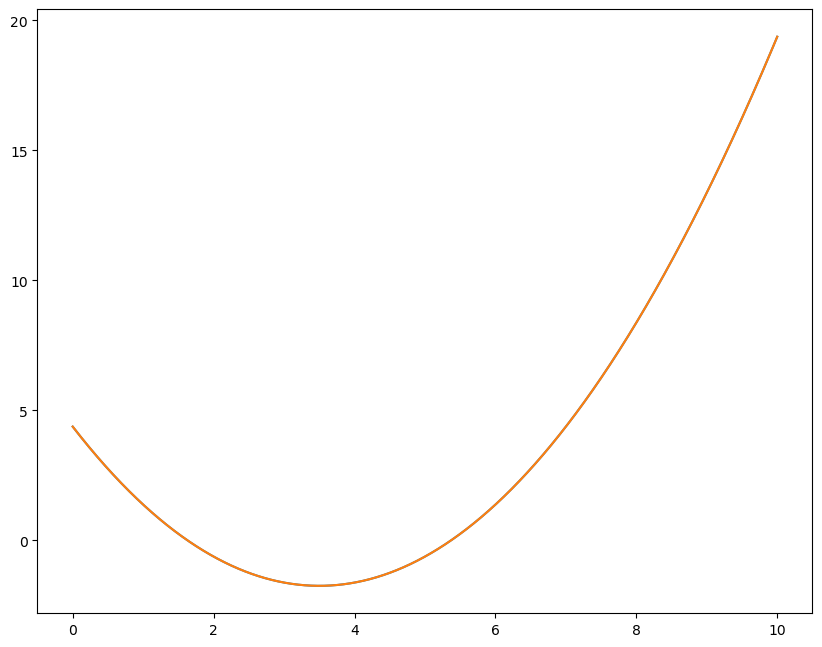

In [21]:
x = np.linspace(0, 10, 10000)
plt.plot(x, LaguerrePolynomials[2](x))
plt.plot(x, genlaguerre(2, 3/2)(x))

In [ ]:
from scipy.special import laguerre

In [31]:
a.integer_charges * 

array([0, 1, 2, 3, 4, 5, 6])

In [39]:
a.base_particle

'C'

In [33]:
density_gradient.get?

Signature: density_gradient.get(key, default=None, /)
Docstring: Return the value for key if key is in the dictionary, else default.
Type:      builtin_function_or_method


In [24]:
from plasmapy.transport.neoclassical import ξ

In [29]:
a.number_densities

<Quantity [0.00000000e+00, 1.33333333e+18, 1.33333333e+18, 1.33333333e+18,
           1.33333333e+18, 1.33333333e+18, 1.33333333e+18] 1 / m3>

In [9]:
sym = "H 1+"
S_pt = fc.S_pt[sym]

<Quantity [ 0.23406213, -0.88328594,  0.        ] J2 / (A m6)>

In [10]:
Aai = fc.Aai[sym]

<Quantity [[-0.91080516,  1.08253925, -1.13695946],
           [ 1.08253925,  1.64573144,  3.26856475],
           [-1.13695946,  3.26856475, -5.52743506]] kg / (m3 s)>

In [8]:
H = fc.all_species["H"]

<IonizationState instance for H>

In [9]:
(S_pt / Aai).si

<Quantity [[-0.00102996, -0.00300935, -0.        ],
           [ 0.00082438, -0.00116699,  0.        ],
           [-0.00075913, -0.00100551, -0.        ]] V / m>

### Bootstrap current

In [10]:
fc.bootstrap_current.si  # TODO should be A/m^2? missing a magnetic field in the denominator somewhere?

<Quantity -0.02879324 Pa / m>

In [11]:
(fc.bootstrap_current / u.T).to(u.A / u.m ** 2)

<Quantity -0.02879324 A / m2>

### Fluxes

The units are horribly off for each of them atm.

In [12]:
flux_unit = u.m ** -2 / u.s

Unit("1 / (m2 s)")

In [13]:
fc._fluxes_BP

{'H 1+': Fluxes(particle_flux=<Quantity -7.98501624e+15 1 / (m2 s)>, heat_flux=<Quantity 0.04670417 kg / s3>),
 'C 6+': Fluxes(particle_flux=<Quantity 1.14384766e+09 1 / (m2 s)>, heat_flux=<Quantity -1.78151124e-10 kg / s3>)}

In [14]:
fc._fluxes_BP["H 1+"].particle_flux.to(flux_unit)

<Quantity -7.98501624e+15 1 / (m2 s)>

In [15]:
fc._fluxes_BP["H 1+"].heat_flux.to(u.J * flux_unit)

<Quantity 0.04670417 J / (m2 s)>

In [16]:
fc._fluxes_CL

{'H 1+': Fluxes(particle_flux=<Quantity -1.12773871e+15 Pa / m5>, heat_flux=<Quantity -0.00453989 kg2 / (m4 s4)>),
 'C 6+': Fluxes(particle_flux=<Quantity 1.63916787e+14 Pa / m5>, heat_flux=<Quantity -8.14217635e-05 kg2 / (m4 s4)>)}

In [17]:
(fc._fluxes_CL["H 1+"].particle_flux / (u.kg / u.s / u.m ** 4)).to(flux_unit)

<Quantity -1.12773871e+15 1 / (m2 s)>

In [18]:
(fc._fluxes_CL["H 1+"].heat_flux / (u.kg / u.s / u.m ** 4)).to(u.J * flux_unit)

<Quantity -0.00453989 J / (m2 s)>

In [19]:
fc._fluxes_PS

{'H 1+': Fluxes(particle_flux=<Quantity -7.31905529e+15 Pa / m4>, heat_flux=<Quantity -0.02946402 kg2 / (m3 s4)>),
 'C 6+': Fluxes(particle_flux=<Quantity 1.06382447e+15 Pa / m4>, heat_flux=<Quantity -0.00052843 kg2 / (m3 s4)>)}

In [20]:
(fc._fluxes_PS["H 1+"].particle_flux / (u.kg / u.s / u.m ** 3)).to(flux_unit)

<Quantity -7.31905529e+15 1 / (m2 s)>

In [21]:
(fc._fluxes_PS["H 1+"].heat_flux / (u.kg / u.s / u.m ** 3)).to(u.J * flux_unit)

<Quantity -0.02946402 J / (m2 s)>

In [22]:
flux_unit = u.m ** -2 / u.s

Unit("1 / (m2 s)")

In [23]:
[
    (flux[sym].particle_flux.unit.si / flux_unit).si
    for flux in [fc._fluxes_BP, fc._fluxes_CL, fc._fluxes_PS]
]

[Unit(dimensionless), Unit("kg / (m4 s)"), Unit("kg / (m3 s)")]

In [24]:
[
    (flux[sym].heat_flux.unit / flux_unit / u.J).si
    for flux in [fc._fluxes_BP, fc._fluxes_CL, fc._fluxes_PS]
]

[Unit(dimensionless), Unit("kg / (m4 s)"), Unit("kg / (m3 s)")]